In [76]:
import numpy as np
import random
import torch
from torch import nn, optim
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm  # pip install tqdm

In [77]:
import cifar10_model as cifar10_model
model_file="cifar10_model.pt"
epochs=50
end_loss=0.65

In [78]:
# import cifar10_resnet as cifar10_model
# model_file="cifar10_resnet.pt"
# epochs=10
# end_loss=0.45

In [79]:
torch.manual_seed(10)
np.random.seed(10)
random.seed(10)

In [80]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914,0.4822,0.4465),
        std=(0.2470,0.2435,0.2616))
])

In [81]:
train_data=datasets.CIFAR10('data/cifar10/train',train=True,download=True,transform=transform)
print(train_data.data.shape)

Files already downloaded and verified
(50000, 32, 32, 3)


In [82]:
dev_size=0.2
idx=list(range(len(train_data)))
np.random.shuffle(idx)
split_size=int(np.floor(dev_size*len(train_data)))
train_idx, dev_idx=idx[split_size:], idx[:split_size]
train_sampler=SubsetRandomSampler(train_idx)
dev_sampler=SubsetRandomSampler(dev_idx)

In [83]:
batch_size=100
train_loader= DataLoader(train_data,batch_size=batch_size,sampler=train_sampler)
dev_loader= DataLoader(train_data,batch_size=batch_size,sampler=dev_sampler)
print(len(train_loader),len(dev_loader))

400 100


In [84]:
data_batch,label_batch=next(iter(train_loader))
print(data_batch.size(),label_batch.size())

torch.Size([100, 3, 32, 32]) torch.Size([100])


In [85]:
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"deivce:{device}")

deivce:cpu


In [86]:
model=cifar10_model.CNN().to(device)

In [87]:
loss_function=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(), lr=0.001)

In [88]:
train_losses=[]
dev_losses=[]
x_axis=[]
for epoch in range(epochs+1):
    train_loss=0
    # 訓練資料
    model.train()
    for data,target in tqdm(train_loader):        
        data=data.to(device)
        target=target.to(device)
        
        pred=model(data)
        loss=loss_function(pred,target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()

    train_loss=train_loss/len(train_loader)
    
    x_axis.append(epoch)
    with torch.no_grad():
        dev_loss=0
        # 驗證資料
        model.eval()
        for data_dev,target_dev in tqdm(dev_loader):               
            data_dev=data_dev.to(device)
            target_dev=target_dev.to(device)

            dev_pred=model(data_dev)
            loss2=loss_function(dev_pred,target_dev)
            dev_loss += loss2.item()

        dev_loss=dev_loss/len(dev_loader)

    train_losses.append(train_loss)
    dev_losses.append(dev_loss)

    print(f"epoch: {epoch}, Train_loss: {train_loss:.3f}, Valid_loss: {dev_loss:.3f}")
    
    if train_loss < end_loss:
        break

100%|██████████| 100/100 [00:00<00:00, 105.77it/s]


epoch: 0, Train_loss: 1.721, Valid_loss: 1.427


100%|██████████| 100/100 [00:00<00:00, 110.07it/s]


epoch: 1, Train_loss: 1.392, Valid_loss: 1.280


100%|██████████| 100/100 [00:00<00:00, 109.85it/s]


epoch: 2, Train_loss: 1.269, Valid_loss: 1.169


100%|██████████| 100/100 [00:01<00:00, 97.38it/s]


epoch: 3, Train_loss: 1.182, Valid_loss: 1.082


100%|██████████| 100/100 [00:00<00:00, 109.12it/s]


epoch: 4, Train_loss: 1.116, Valid_loss: 1.047


100%|██████████| 100/100 [00:00<00:00, 102.96it/s]


epoch: 5, Train_loss: 1.071, Valid_loss: 1.041


100%|██████████| 100/100 [00:00<00:00, 109.31it/s]


epoch: 6, Train_loss: 1.025, Valid_loss: 0.963


100%|██████████| 100/100 [00:00<00:00, 110.31it/s]


epoch: 7, Train_loss: 0.989, Valid_loss: 0.946


100%|██████████| 100/100 [00:00<00:00, 109.24it/s]


epoch: 8, Train_loss: 0.958, Valid_loss: 0.953


100%|██████████| 100/100 [00:00<00:00, 101.72it/s]


epoch: 9, Train_loss: 0.933, Valid_loss: 0.903


100%|██████████| 100/100 [00:00<00:00, 108.55it/s]


epoch: 10, Train_loss: 0.910, Valid_loss: 0.917


100%|██████████| 100/100 [00:00<00:00, 107.89it/s]


epoch: 11, Train_loss: 0.891, Valid_loss: 0.891


100%|██████████| 100/100 [00:00<00:00, 108.61it/s]


epoch: 12, Train_loss: 0.870, Valid_loss: 0.881


100%|██████████| 100/100 [00:00<00:00, 106.23it/s]


epoch: 13, Train_loss: 0.847, Valid_loss: 0.881


100%|██████████| 100/100 [00:00<00:00, 108.92it/s]


epoch: 14, Train_loss: 0.839, Valid_loss: 0.879


100%|██████████| 100/100 [00:00<00:00, 107.60it/s]


epoch: 15, Train_loss: 0.824, Valid_loss: 0.859


100%|██████████| 100/100 [00:00<00:00, 108.99it/s]


epoch: 16, Train_loss: 0.805, Valid_loss: 0.850


100%|██████████| 100/100 [00:00<00:00, 109.52it/s]


epoch: 17, Train_loss: 0.800, Valid_loss: 0.844


100%|██████████| 100/100 [00:00<00:00, 108.42it/s]


epoch: 18, Train_loss: 0.783, Valid_loss: 0.840


100%|██████████| 100/100 [00:00<00:00, 110.46it/s]


epoch: 19, Train_loss: 0.768, Valid_loss: 0.845


100%|██████████| 100/100 [00:00<00:00, 108.36it/s]


epoch: 20, Train_loss: 0.764, Valid_loss: 0.844


100%|██████████| 100/100 [00:00<00:00, 111.00it/s]


epoch: 21, Train_loss: 0.761, Valid_loss: 0.822


100%|██████████| 100/100 [00:00<00:00, 110.14it/s]


epoch: 22, Train_loss: 0.743, Valid_loss: 0.831


100%|██████████| 100/100 [00:00<00:00, 103.74it/s]


epoch: 23, Train_loss: 0.735, Valid_loss: 0.849


100%|██████████| 100/100 [00:00<00:00, 107.46it/s]


epoch: 24, Train_loss: 0.726, Valid_loss: 0.833


100%|██████████| 100/100 [00:00<00:00, 108.45it/s]


epoch: 25, Train_loss: 0.720, Valid_loss: 0.823


100%|██████████| 100/100 [00:00<00:00, 109.02it/s]


epoch: 26, Train_loss: 0.710, Valid_loss: 0.845


100%|██████████| 100/100 [00:00<00:00, 107.57it/s]


epoch: 27, Train_loss: 0.708, Valid_loss: 0.830


100%|██████████| 100/100 [00:00<00:00, 106.75it/s]


epoch: 28, Train_loss: 0.700, Valid_loss: 0.829


100%|██████████| 100/100 [00:00<00:00, 105.75it/s]


epoch: 29, Train_loss: 0.688, Valid_loss: 0.833


100%|██████████| 100/100 [00:00<00:00, 108.37it/s]


epoch: 30, Train_loss: 0.685, Valid_loss: 0.832


100%|██████████| 100/100 [00:00<00:00, 109.32it/s]


epoch: 31, Train_loss: 0.678, Valid_loss: 0.831


100%|██████████| 100/100 [00:00<00:00, 110.74it/s]


epoch: 32, Train_loss: 0.678, Valid_loss: 0.825


100%|██████████| 100/100 [00:00<00:00, 109.49it/s]


epoch: 33, Train_loss: 0.672, Valid_loss: 0.836


100%|██████████| 100/100 [00:00<00:00, 110.32it/s]


epoch: 34, Train_loss: 0.667, Valid_loss: 0.824


100%|██████████| 100/100 [00:00<00:00, 110.22it/s]


epoch: 35, Train_loss: 0.663, Valid_loss: 0.832


100%|██████████| 100/100 [00:00<00:00, 108.65it/s]


epoch: 36, Train_loss: 0.663, Valid_loss: 0.826


100%|██████████| 100/100 [00:00<00:00, 110.23it/s]


epoch: 37, Train_loss: 0.662, Valid_loss: 0.822


100%|██████████| 100/100 [00:00<00:00, 109.70it/s]

epoch: 38, Train_loss: 0.646, Valid_loss: 0.815


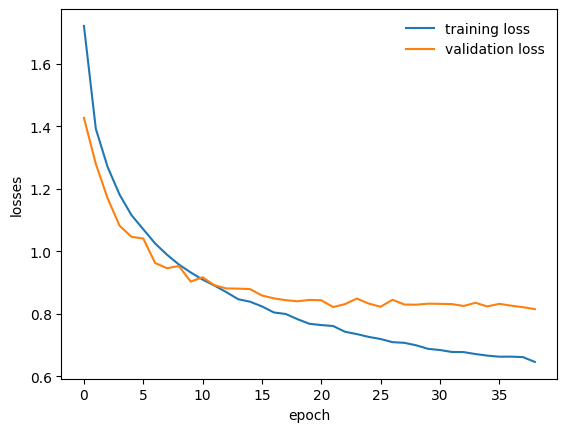

In [89]:
plt.plot(x_axis,train_losses,label="training loss")
plt.plot(x_axis,dev_losses,label="validation loss")
plt.legend(frameon=False)
plt.xlabel('epoch')
plt.ylabel('losses')
plt.show()

In [90]:
model=model.to("cpu")
torch.save(model.state_dict(),model_file)